# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [2]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train is 0.04048000000000006, E_test is 0.41489400000000015


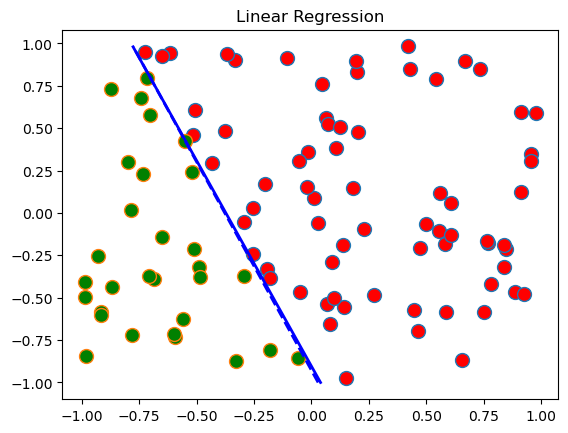

In [3]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

nTest = 1000 # number of testing data
E_train_sum = 0
E_test_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    #TODO
    # Compute training, testing error
    X_bias = np.vstack((np.ones((1, nTrain)), X))
    y_predict = np.sign(w_g.T @ X_bias)
    error_train = np.sum(y_predict != y) / nTrain
    E_train_sum += error_train

    X_test, y_test, w_ = mkdata(nTest)
    X_test_bias = np.vstack((np.ones((1, nTest)), X_test))
    y_test_predict = np.sign(w_g.T @ X_test_bias)
    error_test = np.sum(y_test_predict != y_test) / nTest
    E_test_sum += error_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part2: Linear Regression: noisy

E_train is 0.1319899999999999, E_test is 0.4206489999999999


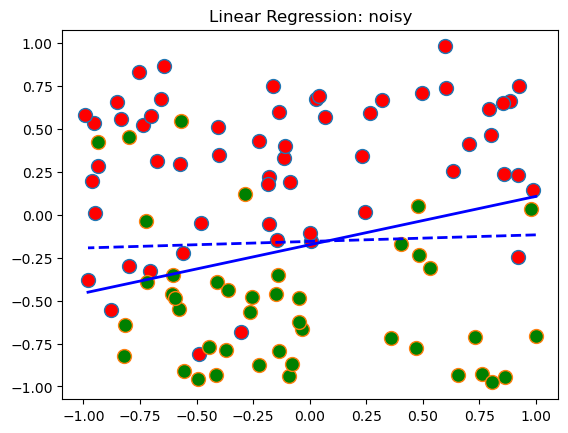

In [4]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

nTest = 1000 # number of testing data
E_train_sum = 0
E_test_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y)
    #TODO
    # Compute training, testing error
    # 和上面一样吧
    X_bias = np.vstack((np.ones((1, nTrain)), X))
    y_predict = np.sign(w_g.T @ X_bias)
    error_train = np.sum(y_predict != y) / nTrain
    E_train_sum += error_train

    X_test, y_test, w_ = mkdata(nTest)
    X_test_bias = np.vstack((np.ones((1, nTest)), X_test))
    y_test_predict = np.sign(w_g.T @ X_test_bias)
    error_test = np.sum(y_test_predict != y_test) / nTest
    E_test_sum += error_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep
    

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part3: Linear Regression: poly_fit

In [5]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
#TODO
# Compute training, testing error
X_b = np.vstack((np.ones((1, X.shape[1])), X))
y_p = np.sign(w.T @ X_b)
E_train = np.mean(y_p != y)

X_test_b = np.vstack((np.ones((1, X_test.shape[1])), X_test))
y_test_p = np.sign(w.T @ X_test_b)
E_test = np.mean(y_test_p != y_test)

print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = X  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = X_test  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
#TODO
# Compute training, testing error
def poly(X, degree):
    feature, n = X.shape
    X_poly = np.vstack((np.ones((1, n)), X))
    for d in range(2, degree+1):
        for i in range(d+1):
            X_poly = np.vstack((X_poly, (X[0]**(d-i)) * (X[1]**i)))
    return X_poly

degree = 2 #经过我的手动测试，degree=2时效果已经极佳，train和test都达到了较低水平。
           #再增加则过拟合，train不一定降低但test升高。
X_t = poly(X, degree)
X_test_t = poly(X_test, degree)
w_poly = linear_regression(X_t[1:, :], y) #linear regression中已经加了bias

y_predict_poly = np.sign(w_poly.T @ X_t)
E_train = np.mean(y_predict_poly != y)

y_test_predict_poly = np.sign(w_poly.T @ X_test_t)
E_test = np.mean(y_test_predict_poly != y_test)

print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part4: Logistic Regression

E_train is 0.0297, E_test is 0.3978300000000001


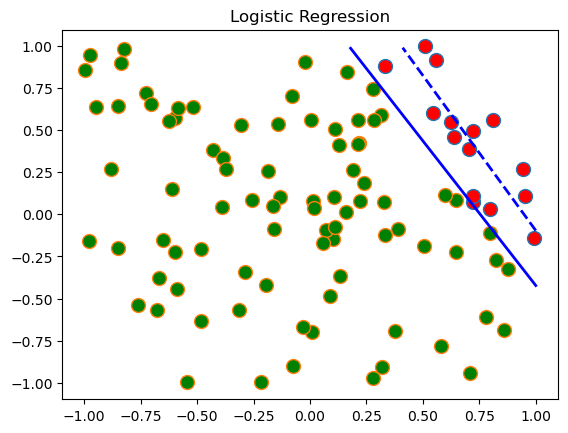

In [18]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

nTest = 1000 # number of testing data
E_train_sum = 0
E_test_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y)
    #TODO
    # Compute training, testing error
    X_bias = np.vstack((np.ones((1, nTrain)), X))
    y_predict = np.sign(w_g.T @ X_bias)
    error_train = np.mean(y_predict != y)
    E_train_sum += error_train

    X_test, y_test, w_ = mkdata(nTest)
    X_test_bias = np.vstack((np.ones((1, nTest)), X_test))
    y_test_predict = np.sign(w_g.T @ X_test_bias)
    error_test = np.mean(y_test_predict != y_test)
    E_test_sum += error_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

E_train is 0.12919999999999998, E_test is 0.4575819999999997


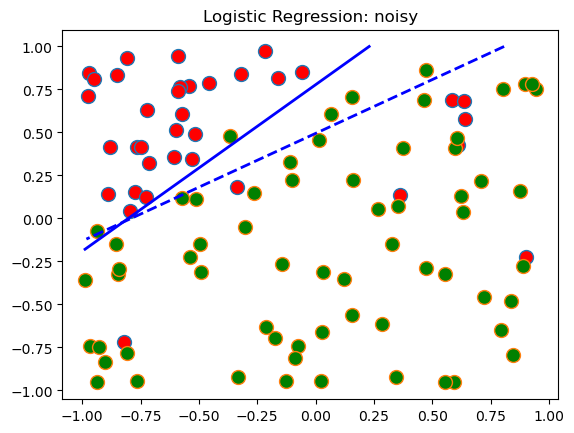

In [20]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

E_train_sum = 0
E_test_sum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    #TODO
    # Compute training, testing error
    X_bias = np.vstack((np.ones((1, nTrain)), X))
    y_predict = np.sign(w_g.T @ X_bias)
    error_train = np.mean(y_predict != y)
    E_train_sum += error_train

    X_test, y_test, w_ = mkdata(nTest)
    X_test_bias = np.vstack((np.ones((1, nTest)), X_test))
    y_test_predict = np.sign(w_g.T @ X_test_bias)
    error_test = np.mean(y_test_predict != y_test)
    E_test_sum += error_test

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

E_train is 0.025370000000000035, E_test is 0.4295989999999997
Average number of support vectors is 28.56.


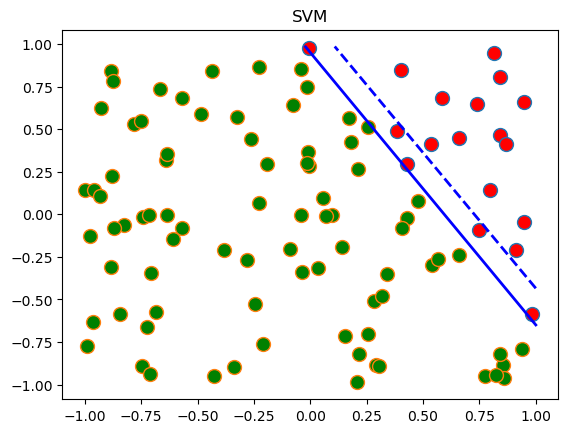

In [41]:
from svm import svm

nRep = 1000; # number of replica tests
nTrain = 100; # number of training data

nTest = 1000 # number of testing data
E_train_sum = 0
E_test_sum = 0
totalNum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    #TODO
    # Compute training, testing error
    # Sum up number of support vectors
    X_bias = np.vstack((np.ones((1, nTrain)), X))
    y_predict = np.sign(w_g.T @ X_bias)
    error_train = np.mean(y_predict != y)
    E_train_sum += error_train

    X_test, y_test, w_ = mkdata(nTest)
    X_test_bias = np.vstack((np.ones((1, nTest)), X_test))
    y_test_predict = np.sign(w_g.T @ X_test_bias)
    error_test = np.mean(y_test_predict != y_test)
    E_test_sum += error_test

    totalNum += num_sc

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep
avgNum = totalNum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')